In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopy.distance import great_circle
from scipy.spatial import distance
from pulp import *
from sklearn.cluster import KMeans

os.chdir('/Users/chengchen/Desktop/Insight/project/')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/chengchen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chengchen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


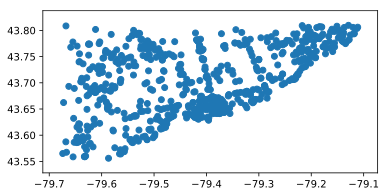

In [20]:
df_parking = pd.read_excel('data/raw/TRT_parking.xlsx')   # len=1417
df_parking_2 = df_parking[df_parking['Rating']>3]  # len=428
# reducing complexity here and only choose the highly-rated parking lots as candidates for EV charger location
def df_to_gdf(df):
    """takes a dataframe with columns named 'longitude' and 'latitude' 
    to transform to a geodataframe with point features"""
    
    df['coordinates'] = df[['longitude', 'latitude']].values.tolist()
    df['coordinates'] = df['coordinates'].apply(Point)
    df = gpd.GeoDataFrame(df, geometry = 'coordinates')
    return df
gdf_parking = df_to_gdf(df_parking_2)
gdf_parking.plot()

In [33]:
gdf_parking.reset_index()
gdf_parking.head()


,ID,Name,latitude,longitude,Rating,Url,coordinates
0,ChIJaQRol2FHK4gRh8JJsjatDhI,Impark Parking (Mississauga Executive Centre P...,43.597325,-79.635916,4.1,https://maps.google.com/?cid=1301167792787669639,POINT (-79.6359159 43.5973255)
1,ChIJo8d888s1K4gRX3ei2idCu68,Impark Parking,43.577757,-79.616419,4.0,https://maps.google.com/?cid=12662787516221519711,POINT (-79.6164191 43.57775729999999)
3,ChIJMU1fXWlHK4gR-SWjLZB_xGs,Mississauga Civic Centre Underground Parking Lot,43.589077,-79.643238,4.0,https://maps.google.com/?cid=7765471914711262713,POINT (-79.64323779999999 43.58907720000001)
9,ChIJQTntZy9HK4gRvKa10zmS7gE,100 City Centre Dr Garage,43.593451,-79.639600,3.9,https://maps.google.com/?cid=139209415557752508,POINT (-79.6396 43.5934513)
11,ChIJuTemeFFHK4gRs1k0r0jiN7Y,Parking (Cooksville Temporary Parking),43.584487,-79.621720,5.0,https://maps.google.com/?cid=13130212040426936755,POINT (-79.62172029999999 43.5844871)


In [42]:
gdf_parking2 = gdf_parking[['latitude','longitude']]
gdf_parking2 = gdf_parking2.reset_index()
gdf_parking2 = gdf_parking2[['latitude','longitude']]

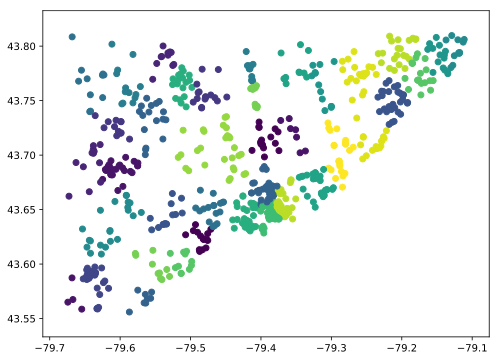

In [46]:


# Scaling the data to normalize
model = KMeans(n_clusters=20).fit(gdf_parking2)
x = gdf_parking2.latitude
y = gdf_parking2.longitude
# Visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(y, x, c=model.labels_.astype(float))


In [44]:
gdf_parking2['cluster'] = model.labels_

In [48]:
gdf_parking2_cluster12 = gdf_parking2[gdf_parking2['cluster']==12]